# Supervised Learning

In [1]:
#import packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import sklearn 
from sklearn import metrics
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier

Supervised Learning algorithms are split into regression and classification. 

As such, the first task was to divide the datasets into continuous numerical and categorical. This is to best fit the datasets to their respective supervised algorithms. 

I first divided the data accordingly. 
Age, Year, Population = continuous numerical. 
Social Class = categorical. 

There are various metrics availavle to score supervised algorithms. For linear regression, I calculated the MSE; and for decision trees I used the mean accuracy score. In multi-label classification, this is a harsh metric since you require for each sample that each label set be correctly predicted.

Overall, the data did not score well on any supervised learning method tried.

There were however, useful insights gained from each dataset using supervised learning.

# Population - Linear Regression

In [2]:
#data prep
dspop = pd.read_csv("file:///Users//erynrigley//Downloads//SocioEconomic.csv")
dspop = dspop.drop(columns = 'Year')
dspop = dspop.drop(columns = 'Area')
dspop = dspop.drop(columns = 'Sex')
dspop = dspop.drop(columns = 'SocioEconomic Class')
dspop = dspop.drop(columns = 'Irish Speakers')
dspop = dspop.drop(columns = 'Non-Irish Speakers')
dspop = dspop.drop(columns = 'Not Stated')

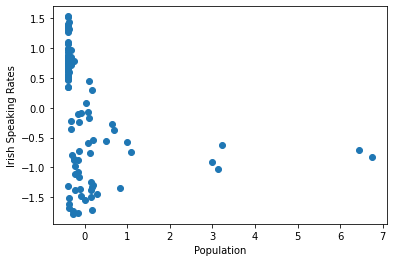

In [3]:
#standardise and segment data
dspop_standardized = preprocessing.scale(dspop)
Xpop = dspop_standardized[:,1:]
Ypop = dspop_standardized[:,0]
X_trainpop, X_testpop, Y_trainpop, Y_testpop = sklearn.model_selection.train_test_split(Xpop, Ypop, test_size = 0.30)
plt.xlabel('Population') #plot data
plt.ylabel('Irish Speaking Rates')
plt.scatter(X_trainpop, Y_trainpop)

In [4]:
#build linear model
lin_reg_pop = LinearRegression()
lin_reg_pop.fit(X_trainpop, Y_trainpop)
y_predict_pop = lin_reg_pop.predict(X_testpop)

Text(0, 0.5, 'Irish Speaking Rates')

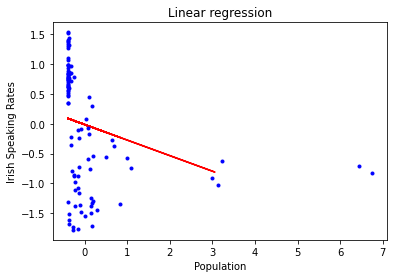

In [26]:
#plot linear model
plt.plot(X_testpop, y_predict_pop, "red")
plt.plot(X_trainpop, Y_trainpop, "b.")
plt.title("Linear regression")
plt.xlabel('Population')
plt.ylabel('Irish Speaking Rates')

In [24]:
#metrics

metrics.mean_squared_error(Y_testpop, y_predict_pop)

0.9312231407429931

Pretty high MSE score

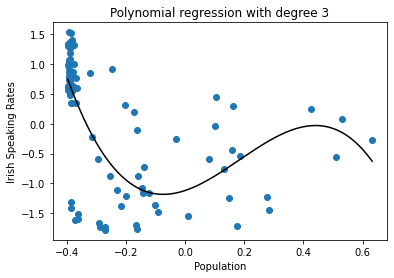

In [7]:
# removing outliers
from sklearn.ensemble import IsolationForest

Xpop_no_outlier = dspop_standardized[:,1:]
Ypop_no_outlier = dspop_standardized[:,0]
X_trainpop3, X_testpop3, Y_trainpop3, Y_testpop3 = sklearn.model_selection.train_test_split(Xpop_no_outlier, Ypop_no_outlier, test_size = 0.30)

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_trainpop3)

mask = yhat != -1
X_trainpop3, Y_trainpop3 = X_trainpop3[mask, :], Y_trainpop3[mask]

#build polynomial model
X_seq = np.linspace(X_trainpop3.min(),X_trainpop3.max(),300).reshape(-1,1)

scaler = preprocessing.StandardScaler()
degree = 3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_trainpop3, Y_trainpop3)
y_polypredict = polyreg_scaled.predict(X_seq)

plt.figure()
plt.scatter(X_trainpop3,Y_trainpop3)
plt.plot(X_seq,polyreg_scaled.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel('Population')
plt.ylabel('Irish Speaking Rates')
plt.show()

In [8]:
#metrics

metrics.mean_squared_error(X_seq, polyreg_scaled.predict(X_seq))

0.6363157045432299

Linear Regression plots an okay model of population, that we would expect to see from our staistical and unsupervised analysis. 

As we would expect to see from our statistical analysis and our unsupervised learning, our linear regression model has predicted that increasing the population decreases Irish Speaking rates(%). But we also see an increase in rates with increase in population. This shows high rates in highly populated areas is not impossible

This model has a high MSE score. This is because of outliers. Work has been done to remove outliers, but this disrupts the distribution of data, and does not improve overall MSE score. It also does not perform better if made into a polynomial.

# Year - Linear Regression

In [9]:
#import province dataset for Years analysis
##(province has the best data on years)

dsyear = pd.read_csv("file:///Users//erynrigley//Downloads//Province.csv")

In [10]:
#trim, clean data and segment data
dsyear = dsyear.drop(columns = 'Province')
dsyear = dsyear.drop(columns = 'Non-Irish Speakers')
dsyear = dsyear.drop(columns = 'Irish Speakers')
dsyear = dsyear.drop(columns = 'Total Population') 

Xyear = dsyear.values[:,1:].astype(int)
Yyear = dsyear.values[:,0].astype(int)
X_trainyear, X_testyear, Y_trainyear, Y_testyear = sklearn.model_selection.train_test_split(Xyear, Yyear, test_size= 0.30)

Text(0.5, 0, 'Irish Speaking Rates')

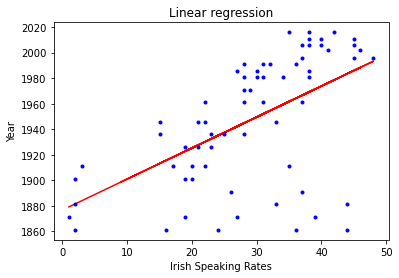

In [11]:
#build linear model

lin_reg_year2 = LinearRegression()
lin_reg_year2.fit(X_trainyear, Y_trainyear)
y_predict_year2 = lin_reg_year2.predict(X_testyear)

plt.plot(X_testyear, y_predict_year2, "r-")
plt.plot(X_trainyear, Y_trainyear, "b.")
plt.title("Linear regression")
plt.ylabel('Year')
plt.xlabel('Irish Speaking Rates')

In [12]:
#metrics

metrics.mean_squared_error(Y_testyear, y_predict_year2)

1051.0933212039613

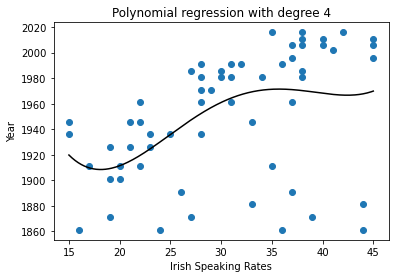

In [13]:
# removing outliers + create polynomial 

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_trainyear)
mask = yhat != -1
X_trainyear, Y_trainyear = X_trainyear[mask, :], Y_trainyear[mask]

X_seq = np.linspace(X_trainyear.min(),X_trainyear.max(),300).reshape(-1,1)

degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_trainyear, Y_trainyear)

plt.figure()
plt.scatter(X_trainyear,Y_trainyear)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))

plt.ylabel('Year')
plt.xlabel('Irish Speaking Rates')
plt.show()

y_predict_fixed = polyreg.predict(X_seq)

In [14]:
#metrics

metrics.mean_squared_error(X_seq, y_predict_fixed)

3678954.7609473355

Overall, this MSE is high, but that doesnt necessarily mean the model is not helpful. Outliers influence this model and its MSE alot. Moreover, the scale of the years influence the MSE.

The problem with outlier removal is that it can have a negative effect on this data. As we can see the x axis representing rate is irish speaking rates has lost some of its data, namely the outliers around 80%. Instead our maximum is the mean average around 47%. 

Moreover, in adding to many degrees to the polynomial model, we can end up overfitting the data, which would undermine the trends we see and would render the model meaningless.

This is trade off in trying to improve linear regression models with outlier removal.

However, we do still gain from applying a plynomial Linear Regression to Years. We can see a strong trend upwards, between year and Irish Speaking Rates, which matches well to the line graph in Statistical Analysis.

# Age - Linear Regression

In [15]:
# data prep
dsage = pd.read_csv("file:///Users//erynrigley//Downloads//AgeGroup.csv")
dsage = dsage.drop(columns = 'Irish Speakers')
dsage = dsage.drop(columns = 'Non-Irish Speakers')
dsage = dsage.drop(columns = 'Not Stated')
dsage = dsage.drop(columns = 'Area')
dsage = dsage.drop(columns = 'Year')
dsage = dsage.drop(columns = 'Population')
dsagecolumns = ['Irish Speakers(%)', 'Age Group']
dsage = dsage[['Irish Speakers(%)', 'Age Group']]

#clean data
label_encoder = preprocessing.LabelEncoder() 
dsage['Age Group'] = label_encoder.fit_transform(dsage['Age Group'])

#segment into training and testing 

Xage = dsage.values[:,1:].astype(int)
Yage = dsage.values[:,0].astype(int)
X_trainage, X_testage, Y_trainage, Y_testage = sklearn.model_selection.train_test_split(Xage, Yage, test_size = 0.30)

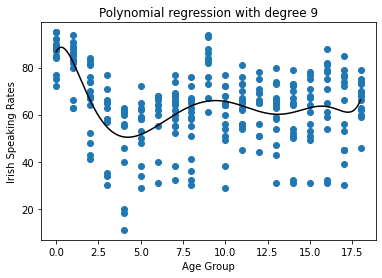

In [16]:
#build polynomial regressive model

X_seq = np.linspace(X_trainage.min(),X_trainage.max(),300).reshape(-1,1)

scaler = preprocessing.StandardScaler()
degree=9
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_trainage, Y_trainage)
y_polypredict = polyreg_scaled.predict(X_testage)

plt.figure()
plt.scatter(X_trainage,Y_trainage)
plt.plot(X_seq,polyreg_scaled.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))

plt.xlabel('Age Group')
plt.ylabel('Irish Speaking Rates')
plt.show()

In [17]:
#metrics

metrics.mean_squared_error(Y_testage, y_polypredict)

233.1226440533437

As with the other supervised models, we get a good model, which shows us where the trends in the data are. This aligns well with previous findings from statistical and unsupervised analysis. 

However, again, even with a polynomial function, we end up with a high MSE score. 

This does not undermine the information we gain from the model. But it does mean more work would need to be done to make the model closer to all points in the data. This could end up overfitting the model, and thereby undermining its validity in data analysis. 

# Social Class - Linear Regression/Decision Tree

In [27]:
#load and clean data 

dssocialclass = pd.read_csv("file:///Users//erynrigley//Downloads//SocialClass.csv")
dssocialclass = dssocialclass.drop(columns = 'Year')
dssocialclass = dssocialclass.drop(columns = 'Area')
dssocialclass = dssocialclass.drop(columns = 'Sex')
dssocialclass = dssocialclass.drop(columns = 'Irish Speakers')
dssocialclass = dssocialclass.drop(columns = 'Non-Irish Speakers')
dssocialclass = dssocialclass.drop(columns = 'Not Stated')
dssocialclass = dssocialclass.drop(columns = 'Population')
label_encoder = preprocessing.LabelEncoder() 
dssocialclass['Social Class'] = label_encoder.fit_transform(dssocialclass['Social Class'])

In [28]:
#segment

Xsc = dssocialclass.values[:,0].astype(int)
Ysc = dssocialclass.values[:,1:].astype(int)
X_trainsc, X_testsc, Y_trainsc, Y_testsc = sklearn.model_selection.train_test_split(Xsc, Ysc, test_size = 0.30)

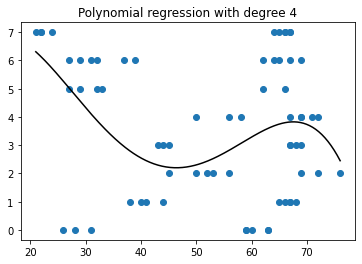

In [20]:
#polynomial linear regression 

Y_seq_sc = np.linspace(Y_trainsc.min(),Y_trainsc.max(),300).reshape(-1,1)

scaler = preprocessing.StandardScaler()
degree=4
polyreg_scaled_sc=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled_sc.fit(Y_trainsc, X_trainsc)
y_polypredict_sc = polyreg_scaled_sc.predict(Y_testsc)

plt.figure()
plt.scatter(Y_trainsc,X_trainsc)
plt.plot(Y_seq_sc,polyreg_scaled_sc.predict(Y_seq_sc),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

Doesn't fit very well. But data is categorical rather than numerical continuous. As such, let's try a classifier. 

Decision Tree is chosen because it is not a binary classifier, such as logistic regression, can handle multiple outputs. Also can handle multiple input features. Also, we get the added benefit of visualising the tree for ease of data analysis. 

For decision trees I used the mean accuracy score. In multi-label classification, this is a harsh metric since you require for each sample that each label set be correctly predicted.

[Text(1420.4296875, 1630.8, 'Irish Speakers(%) <= 25.5\ngini = 0.872\nsamples = 67\nvalue = [7, 9, 7, 9, 7, 10, 10, 8]\nclass = Semi-skilled'),
 Text(494.0625, 1268.4, 'Irish Speakers(%) <= 22.5\ngini = 0.278\nsamples = 6\nvalue = [1, 0, 0, 0, 0, 0, 0, 5]\nclass = All other gainfully occupied and unknown'),
 Text(247.03125, 906.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 0, 3]\nclass = All other gainfully occupied and unknown'),
 Text(741.09375, 906.0, 'Irish Speakers(%) <= 23.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 0, 0, 0, 0, 2]\nclass = All other gainfully occupied and unknown'),
 Text(494.0625, 543.6000000000001, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 0, 0, 1]\nclass = All social classes'),
 Text(988.125, 543.6000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1]\nclass = All other gainfully occupied and unknown'),
 Text(2346.796875, 1268.4, 'Irish Speakers(%) <= 37.5\ngini = 0.864\nsamples = 61\nvalue = [6, 9, 7, 9, 7, 10, 10, 3]\n

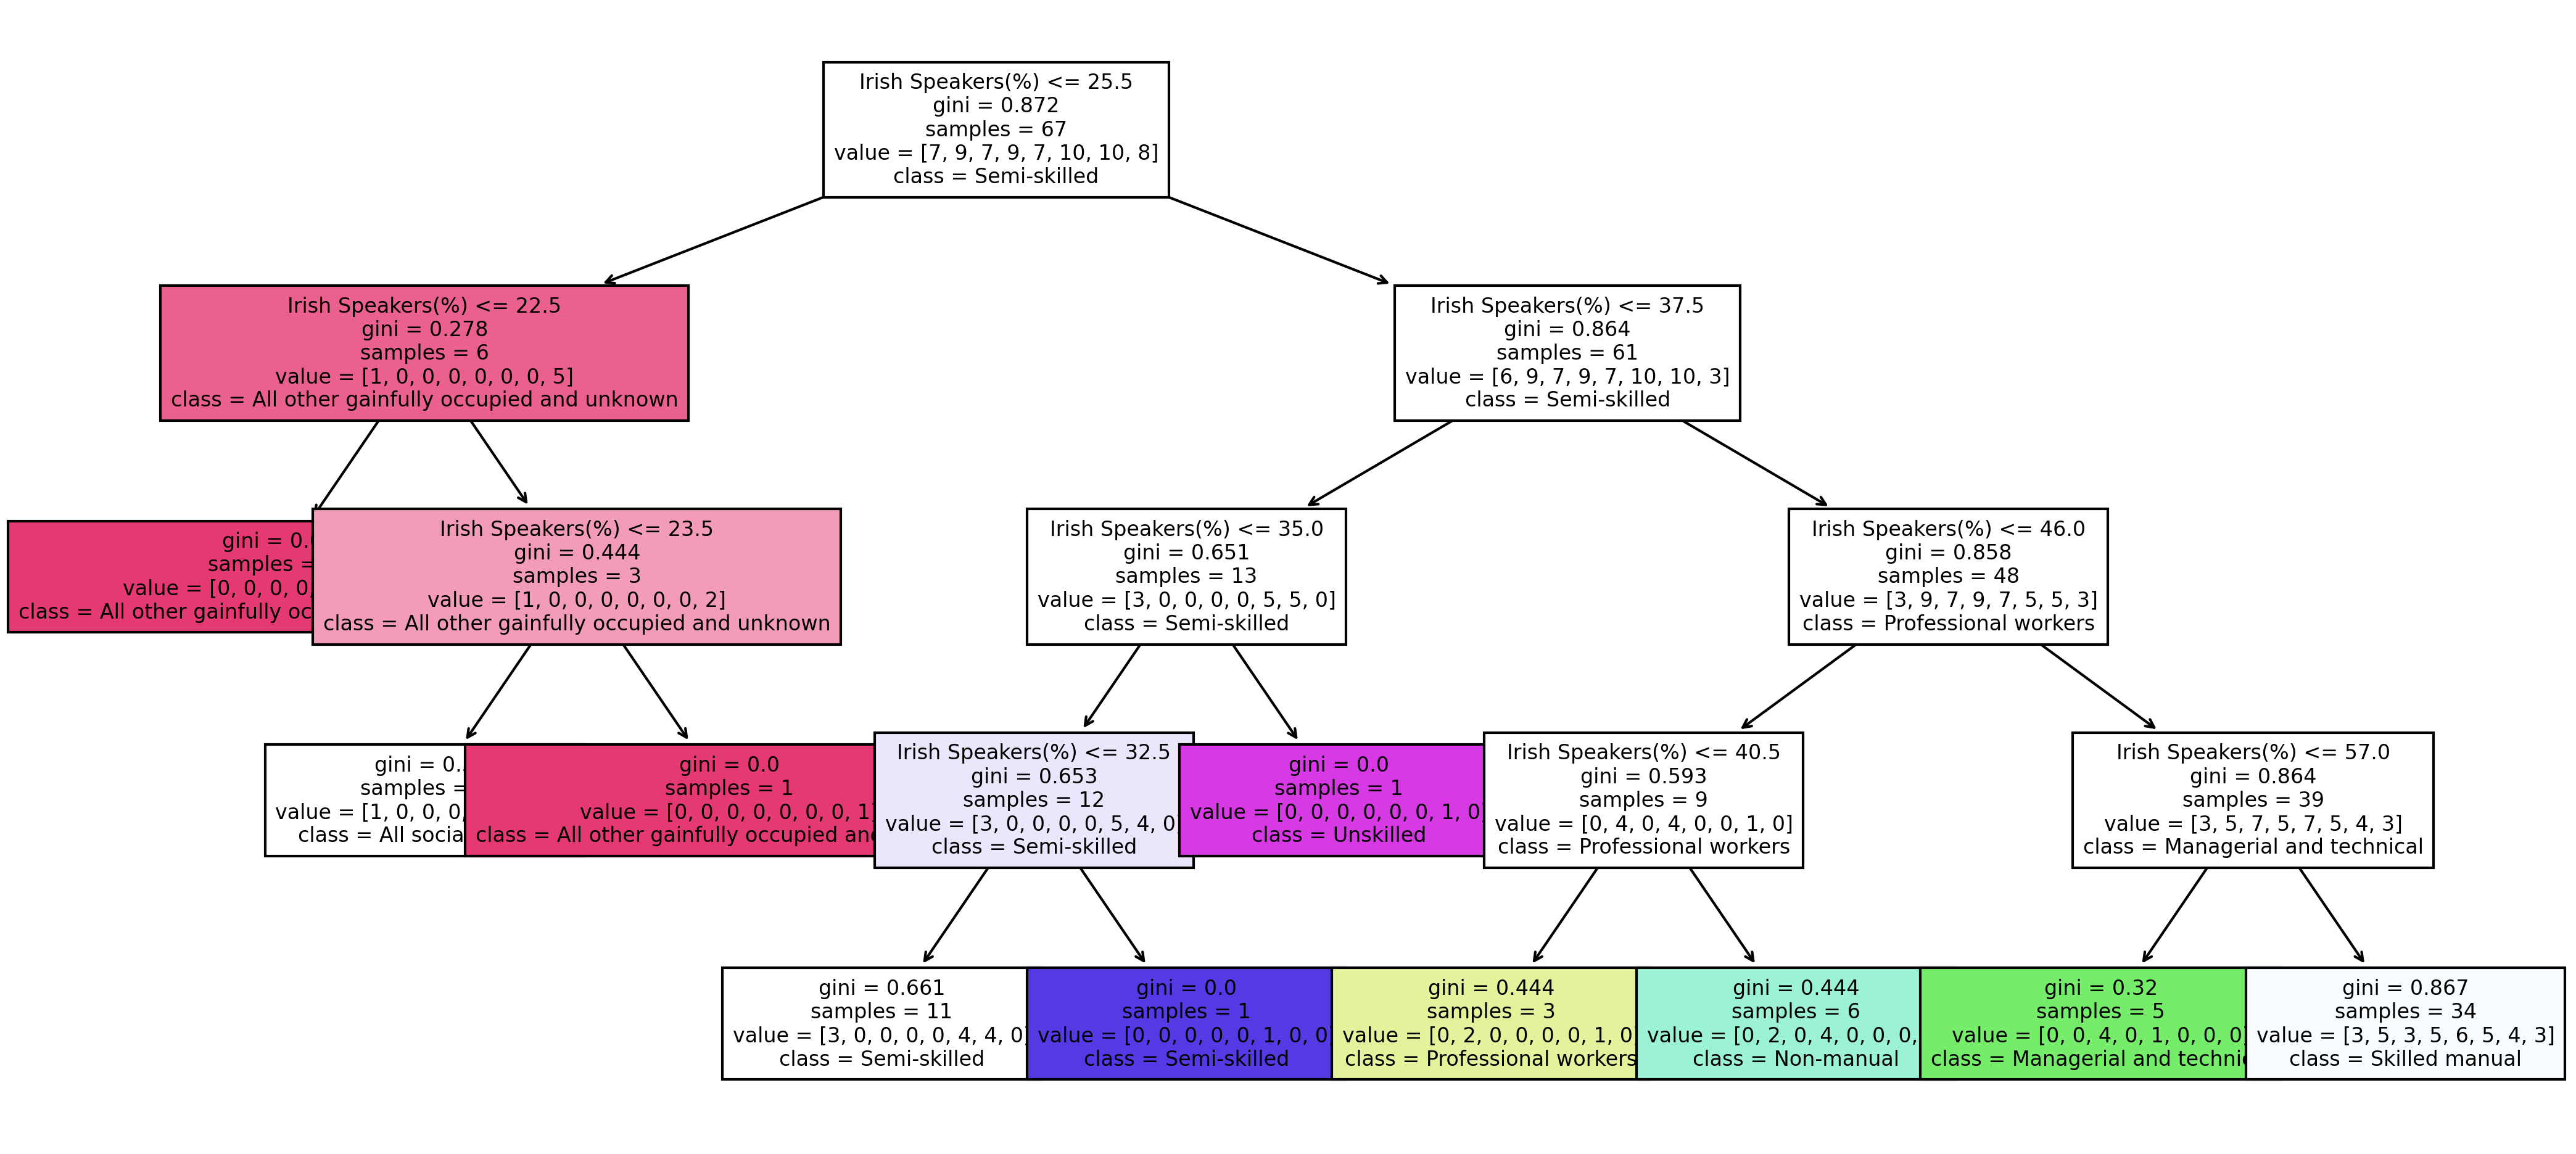

In [29]:
#build Decision Tree Classifier

clf = DecisionTreeClassifier(max_depth = 4, #max-depth of tree
                             random_state = 0)
clf.fit(Y_trainsc, X_trainsc) #fit
clf.predict(Y_testsc) #predict

#plot decision tree

fn1 = ['Irish Speakers(%)', 'Social Class']
cn1 = ['All social classes',
                        'Professional workers',
                        'Managerial and technical',
                        'Non-manual',
                        'Skilled manual',
                        'Semi-skilled',
                        'Unskilled',
                        'All other gainfully occupied and unknown']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (17,8), dpi=300)
sklearn.tree.plot_tree(clf,
              feature_names = fn1,
               class_names = cn1,
               filled = True, fontsize = 8)

In [30]:
#metrics

clf.score(Y_trainsc, X_trainsc, sample_weight=None)

0.40298507462686567

As to be expected, mean accuracy score is also low. However, again, the benefit of using a decision tree is not only in prediction, but in seeing where important distinctions are made, and the result of those distinctions. For example, according to this tree, we can see move along the bottom nodes to see the distinction between higher classes and lower classes. Higher classes such as managerial and professional are grouped with all classes, showing them to have high rates. Lower classes such as all semi-skilled and all other gainfully occupied and known have lower rates and are cut off at lower points, around 25-30. 

Again, this isn't much we haven't learnt from previous analysis, but it helps to see where this algorithm has made cut off and where it hasnt. 